In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor

In [4]:
df = pd.read_csv("GenderPayGap2.csv")

Preview of Dataset

In [5]:
df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


There are 11 different types of jobs in this dataset

In [6]:
print(df['JobTitle'].unique())

['Graphic Designer' 'Software Engineer' 'Warehouse Associate' 'IT'
 'Sales Associate' 'Driver' 'Financial Analyst' 'Marketing Associate'
 'Data Scientist' 'Manager']


The spread of individuals in each job is pretty even.

In [7]:
print(df['JobTitle'].value_counts()['Graphic Designer'])
print(df['JobTitle'].value_counts()['Software Engineer'])
print(df['JobTitle'].value_counts()['Warehouse Associate'])
print(df['JobTitle'].value_counts()['IT'])
print(df['JobTitle'].value_counts()['Sales Associate'])
print(df['JobTitle'].value_counts()['Driver'])
print(df['JobTitle'].value_counts()['Financial Analyst'])
print(df['JobTitle'].value_counts()['Marketing Associate'])
print(df['JobTitle'].value_counts()['Data Scientist'])
print(df['JobTitle'].value_counts()['Manager'])

98
109
90
96
94
91
107
118
107
90


There are 5 different types of departments in this dataset.

In [8]:
print(df['Dept'].unique())

['Operations' 'Management' 'Administration' 'Sales' 'Engineering']


The spread of individuals in each department is pretty even.

In [9]:
print(df['Dept'].value_counts()['Operations'])
print(df['Dept'].value_counts()['Management'])
print(df['Dept'].value_counts()['Administration'])
print(df['Dept'].value_counts()['Sales'])
print(df['Dept'].value_counts()['Engineering'])

210
198
193
207
192


Gender, Education, Department, and JobTitle are all categorical variables. In order to be able to use these features for our models we must integer encode them so that they
can be numerical features.

In [10]:
newGender = {'Gender':{'Male':0,'Female':1}}
df = df.replace(newGender)
newEducation = {'Education':{'High School':0,'College':1,'Masters':2,'PhD':3}}
df = df.replace(newEducation)
newJobTitle = {'JobTitle':{'Graphic Designer':0,'Software Engineer':1,'Warehouse Associate':2,'IT':3, 'Sales Associate':4,'Driver':5,'Financial Analyst':6,'Marketing Associate':7,'Data Scientist':8,'Manager':9}}
df = df.replace(newJobTitle)
newDept = {'Dept':{'Operations':0,'Management':1,'Administration':2,'Sales':3, 'Engineering':4}}
df = df.replace(newDept)

Preview of data with integer encoding in place.

In [11]:
df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,0,1,18,5,1,0,2,42363,9938
1,1,0,21,5,1,1,5,108476,11128
2,2,1,19,4,3,2,5,90208,9268
3,1,0,20,5,2,3,4,108080,10154
4,0,0,26,5,2,4,5,99464,9319


The Bonus feature is dropped because we only want to focus on one type of income. Basepay is a much more telling feature, which is why we will keep Basepay instead of Bonus.

In [12]:
df = df.drop(columns='Bonus')

In order to see which variables we should use for our models we will see how each variable correlates with BasePay (target). Variables with higher correlations are good indicators that those variables will do well in predicting the target variable. PerfEval, JobTitle, and Dept have very low correlations with BasePay so we will not use them in our models.

In [13]:
df.corr()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay
JobTitle,1.000000,0.108362,0.031353,-0.067511,0.013636,-0.024136,-0.014549,0.074094
Gender,0.108362,1.000000,0.028625,-0.066627,-0.056454,0.017852,0.028131,-0.167766
Age,0.031353,0.028625,1.000000,-0.056875,0.019835,-0.001154,-0.021414,0.562681
PerfEval,-0.067511,-0.066627,-0.056875,1.000000,0.060037,0.016840,-0.021127,-0.053622
Education,0.013636,-0.056454,0.019835,0.060037,1.000000,0.010452,0.049004,0.172541
Dept,-0.024136,0.017852,-0.001154,0.016840,0.010452,1.000000,0.063307,0.080623
Seniority,-0.014549,0.028131,-0.021414,-0.021127,0.049004,0.063307,1.000000,0.511096
BasePay,0.074094,-0.167766,0.562681,-0.053622,0.172541,0.080623,0.511096,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

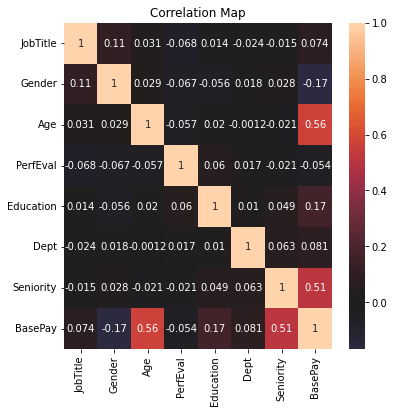

In [14]:
plt.figure(figsize = (6,6))
sns.heatmap(df.corr(), center=0, annot=True)
plt.title('Correlation Map')
plt.show

The first model we will use is linear regression. To prepare the model we train and test the model using a test, train split.

In [15]:
train, test = train_test_split(df, test_size=0.2, random_state=1)
model = LinearRegression()
model.fit(
    X=train[["Age", "Gender", "Education", "Seniority"]],
    y=train["BasePay"]
)
predicted = model.predict(
    X=test[["Age", "Gender", "Education", "Seniority"]]
)
expected = test["BasePay"]

To measure the accuracy of the model we look at the mean squared error and the root mean squared error. In our opinion, the error is somewhat high because there are only 1000 rows of data in this dataset. With a small training and test set, the model will have higher variation.

In [16]:
lr_mse = mean_squared_error(expected, predicted)
print(lr_mse)
lr_rmse = mean_squared_error(expected, predicted, squared = False)
print(lr_rmse)

236749224.74826562
15386.657361112115


To see which variables held more weight in the model we used the SelectKbest function to be able to see which variables had the highest importance scores. In the figure we see that Age and Seniority had a high importance, while Gender and Education didn't have much importance.

Feature 0: 370.368230
Feature 1: 18.045034
Feature 2: 21.372117
Feature 3: 280.806801


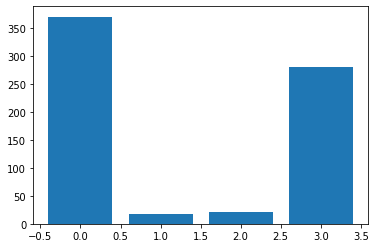

In [17]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

# feature selection
def select_features(X_train, y_train, X_test):
 # configure to select all features
 fs = SelectKBest(score_func=f_regression, k='all')
 # learn relationship from training data
 fs.fit(X_train, y_train)
 # transform train input data
 X_train_fs = fs.transform(X_train)
 # transform test input data
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs
 
# feature selection
X_train_fs, X_test_fs, fs = select_features(train[["Age", "Gender", "Education", "Seniority"]], train["BasePay"], test[["Age", "Gender","Education", "Seniority"]])
# what are scores for the features
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Below is a preview of the predicted BasePay on the actual data.

In [18]:
df["Predicted BasePay Linear"] = model.predict(
    X=df[["Age", "Gender","Education", "Seniority"]]
)

In [19]:
df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Predicted BasePay Linear
0,0,1,18,5,1,0,2,42363,55391.632648
1,1,0,21,5,1,1,5,108476,95615.580662
2,2,1,19,4,3,2,5,90208,90655.960673
3,1,0,20,5,2,3,4,108080,87923.944313
4,0,0,26,5,2,4,5,99464,103602.804080


The second model we will use is K-nearest neighbors regression. To prepare the model we train and test the model using a test, train split.

In [20]:
x_data = df[["Age", "Gender","Education", "Seniority"]]
y_data = df["BasePay"]
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data,test_size=0.2, random_state = 1)
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
predicted = knn_model.predict(X_train)

To measure the accuracy of the model we look at the mean squared error and the root mean squared error. In our opinion, the error is somewhat high because there are only 1000 rows of data in this dataset. With a small training and test set, the model will have higher variation.

In [21]:
mse = mean_squared_error(y_train, predicted)
print(mse)
rmse = mean_squared_error(y_train, predicted,squared = False)
print(rmse)

191576384.13995004
13841.112099103526


Below is a preview of the predicted BasePay on the actual data.

In [22]:
df["Predicted BasePay KNN"] = knn_model.predict(
    X=df[["Age", "Gender","Education", "Seniority"]]
)

In [23]:
df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Predicted BasePay Linear,Predicted BasePay KNN
0,0,1,18,5,1,0,2,42363,55391.632648,58590.2
1,1,0,21,5,1,1,5,108476,95615.580662,99977.6
2,2,1,19,4,3,2,5,90208,90655.960673,90283.6
3,1,0,20,5,2,3,4,108080,87923.944313,90789.4
4,0,0,26,5,2,4,5,99464,103602.804080,108600.4


Created "Age_Group" column for better visuals for Bias later on.

In [24]:
df.loc[df['Age']<=20, 'Age_Group'] = '0-20'
df.loc[df['Age'].between(20,30), 'Age_Group'] = '20-30'
df.loc[df['Age'].between(30,40), 'Age_Group'] = '30-40'
df.loc[df['Age'].between(40,50), 'Age_Group'] = '40-50'
df.loc[df['Age']>50, 'Age_Group'] = '50+'



Created "is_rich" column with binary values where if the base pay is higher than the median, then they are considered higher income.

In [25]:
df['is_rich'] = pd.cut(df["BasePay"], bins=[0, df["BasePay"].median(), float('Inf')], labels=[0, 1])
df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Predicted BasePay Linear,Predicted BasePay KNN,Age_Group,is_rich
0,0,1,18,5,1,0,2,42363,55391.632648,58590.2,0-20,0
1,1,0,21,5,1,1,5,108476,95615.580662,99977.6,20-30,1
2,2,1,19,4,3,2,5,90208,90655.960673,90283.6,0-20,0
3,1,0,20,5,2,3,4,108080,87923.944313,90789.4,20-30,1
4,0,0,26,5,2,4,5,99464,103602.804080,108600.4,20-30,1


Preprocessed data and added "Age_Group" to knn trained model.

In [26]:
x_data = df[["Age", "Gender","Education", "Seniority", "Age_Group",]]
y_data = df[["BasePay", "is_rich"]]
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(x_data, y_data,test_size=0.2, random_state = 1)
X_train = X_train_cat[["Age", "Gender","Education", "Seniority"]]
X_test = X_test_cat[["Age", "Gender","Education", "Seniority"]]
y_train = y_train_cat["BasePay"]
y_test = y_test_cat["BasePay"]
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
predicted = knn_model.predict(X_test)
knn_score = knn_model.score(X_test,y_test)
print(predicted)
print(knn_score)
x_data.head()

[120734.8 128454.2  97306.8 109223.   69802.8 135800.2  84679.8 121814.
 103076.8  78327.  142496.8  83553.8 114664.8  72569.2 109090.2  75289.6
  86544.6  73091.8 103171.8  84735.6  68184.   65772.8 116225.8  97296.8
  97077.   94061.8  86431.8 120127.4  58735.4 100338.6  57239.2  80611.2
  91975.4  73222.4  74761.6 128297.4  82165.8 104837.8  65254.2 101585.2
 115761.4  80556.6  75889.8 115402.2  68950.   59462.8  98173.2  95286.6
  67089.  101304.8 100416.8 119509.4  77324.2  91947.6  71707.6  57084.8
  95758.8  87180.6 139027.  120867.2  93035.6  92322.  131018.2  92987.4
 110636.8  63473.2  77437.  107937.8 119701.4  95005.8  95433.4  75492.6
 105515.8  95889.2 107588.   69218.2  88612.2 108401.  131133.4  90269.6
  60855.   91708.2 119866.4  54831.4  94710.6 105243.8 114328.2  91572.4
  68281.2  82584.   86707.8  79858.2  86364.8 105031.8  62462.   98796.8
 106438.2 106387.2 123696.4  83629.4  90927.8  97134.4  82292.6  97072.2
  88367.2  59916.8  76630.   72684.   81304.4 107352

,Age,Gender,Education,Seniority,Age_Group
0,18,1,1,2,0-20
1,21,0,1,5,20-30
2,19,1,3,5,0-20
3,20,0,2,4,20-30
4,26,0,2,5,20-30


Recalculated MSE

In [27]:
mse = mean_squared_error(y_test, predicted)
print(mse)
rmse = mean_squared_error(y_test, predicted,squared = False)
print(rmse)

304428359.2842
17447.875494861833


Installed aequitas toolkit

In [28]:
!pip install -q aequitas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 KB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 KB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 KB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.8/727.8 KB 33.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 456.4/456.4 KB 34.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 KB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 KB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 70.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

Created "score" which is the predicted value of "is_rich" and renamed "is_rich" to label_value. A score of 1 means the person if of higher income.

In [29]:
import aequitas 
from aequitas.preprocessing import preprocess_input_df
    
# double-check that categorical columns are of type 'string'
df = pd.DataFrame(X_test_cat)
df[["Gender","Education", "Seniority", "Age_Group"]] = df[["Gender","Education", "Seniority", "Age_Group"]].astype(str)
df["score"] = predicted > y_test.median()
df["label_value"] = y_test_cat["is_rich"]
print(type(y_test.iloc[0]))
df["score"] = df["score"].astype(int)
df.head()

<class 'numpy.int64'>


,Age,Gender,Education,Seniority,Age_Group,score,label_value
507,63,1,1,5,50+,1,1
818,56,1,0,5,50+,1,1
452,21,1,1,5,20-30,1,0
368,49,1,1,4,40-50,1,1
242,19,0,1,3,0-20,0,0


In [30]:
df = df.drop(columns="Age")
df, _ = preprocess_input_df(df)

In [31]:
from aequitas.group import Group
    
g = Group()
xtab, _ = g.get_crosstabs(df)

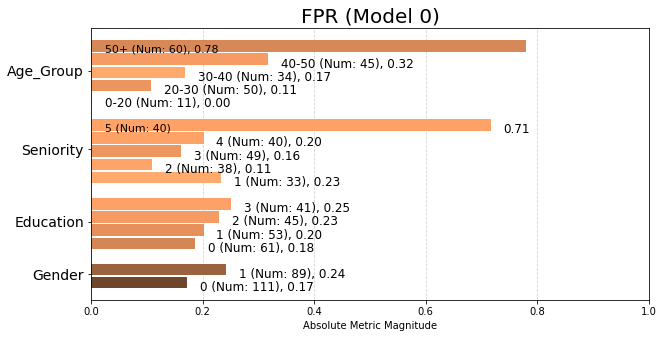

In [32]:
from aequitas.plotting import Plot
    
aqp = Plot()
fpr_plot = aqp.plot_group_metric(xtab, 'fpr')

Dropped age column and created a False Positive Rate plot . The decimal represents the likelihood of the prediction to be wrong. The prediction of Males is 0.17 times more likely to be wrong about being higher income earners.

Created reference group to be Males with a masters degree and a seniority level of 3.

In [33]:
from aequitas.bias import Bias
b = Bias()
bdf = b.get_disparity_predefined_groups(xtab, original_df=df, ref_groups_dict={'Gender':'0', 'Education':'2', 'Age_Group':'30-40', 'Seniority': '3'}, alpha=0.05, mask_significance=True)
bdf.style

get_disparity_predefined_group()


,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity,ppr_ref_group_value,pprev_ref_group_value,precision_ref_group_value,fdr_ref_group_value,for_ref_group_value,fpr_ref_group_value,fnr_ref_group_value,tpr_ref_group_value,tnr_ref_group_value,npv_ref_group_value
0,0,binary 0/1,97,Gender,0,0.750000,0.829787,0.290909,0.142857,0.170213,0.250000,0.709091,0.857143,56,55,0.577320,0.504505,8,16,39,48,64,47,111,200,0.576577,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0,0,0,0,0,0,0,0,0,0
1,0,binary 0/1,97,Gender,1,0.800000,0.759259,0.145833,0.317073,0.240741,0.200000,0.854167,0.682927,41,48,0.422680,0.460674,13,7,41,28,35,54,89,200,0.393258,0.732143,0.913122,0.796748,2.219512,0.501302,1.414352,0.800000,1.066667,0.915005,1.204594,0,0,0,0,0,0,0,0,0,0
2,0,binary 0/1,97,Education,0,0.652174,0.815789,0.205128,0.318182,0.184211,0.347826,0.794872,0.681818,22,39,0.226804,0.360656,7,8,31,15,23,38,61,200,0.377049,1.000000,0.737705,0.882353,1.400000,0.786325,0.810526,1.333333,0.882353,1.055728,1.075415,2,2,2,2,2,2,2,2,2,2
3,0,binary 0/1,97,Education,1,0.857143,0.800000,0.166667,0.172414,0.200000,0.142857,0.833333,0.827586,29,24,0.298969,0.547170,5,4,20,24,28,25,53,200,0.528302,1.318182,1.119211,1.070994,0.758621,0.638889,0.880000,0.547619,1.159664,1.035294,1.127451,2,2,2,2,2,2,2,2,2,2
4,0,binary 0/1,97,Education,2,0.739130,0.772727,0.260870,0.227273,0.227273,0.260870,0.739130,0.772727,22,23,0.226804,0.488889,5,6,17,17,23,22,45,200,0.511111,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2,2,2,2,2,2,2,2,2,2
5,0,binary 0/1,97,Education,3,0.800000,0.750000,0.294118,0.166667,0.250000,0.200000,0.705882,0.833333,24,17,0.247423,0.585366,4,5,12,20,25,16,41,200,0.609756,1.090909,1.197339,1.078431,0.733333,1.127451,1.100000,0.766667,1.082353,0.970588,0.955017,2,2,2,2,2,2,2,2,2,2
6,0,binary 0/1,97,Seniority,1,0.428571,0.769231,0.166667,0.666667,0.230769,0.571429,0.833333,0.333333,9,24,0.092784,0.272727,6,4,20,3,7,26,33,200,0.212121,0.450000,0.668182,0.416667,3.333333,0.604167,1.442308,1.714286,0.642857,0.915751,1.150794,3,3,3,3,3,3,3,3,3,3
7,0,binary 0/1,97,Seniority,2,0.700000,0.892857,0.107143,0.300000,0.107143,0.300000,0.892857,0.700000,10,28,0.103093,0.263158,3,3,25,7,10,28,38,200,0.263158,0.500000,0.644737,0.875000,1.500000,0.388393,0.669643,0.900000,1.050000,1.062925,1.232993,3,3,3,3,3,3,3,3,3,3
8,0,binary 0/1,97,Seniority,3,0.666667,0.840000,0.275862,0.200000,0.160000,0.333333,0.724138,0.800000,20,29,0.206186,0.408163,4,8,21,16,24,25,49,200,0.489796,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3,3,3,3,3,3,3,3,3,3
9,0,binary 0/1,97,Seniority,4,0.760000,0.800000,0.333333,0.136364,0.200000,0.240000,0.666667,0.863636,22,18,0.226804,0.550000,3,6,12,19,25,15,40,200,0.625000,1.100000,1.347500,1.079545,0.681818,1.208333,1.250000,0.720000,1.140000,0.952381,0.920635,3,3,3,3,3,3,3,3,3,3


In [34]:
calculated_disparities = b.list_disparities(bdf)
disparity_significance = b.list_significance(bdf)
disparity_significance

[]

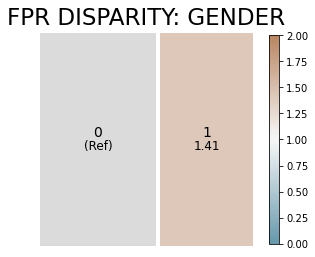

In [35]:
bdf[['attribute_name', 'attribute_value'] +  calculated_disparities + disparity_significance]

aqp.plot_disparity(bdf, group_metric='fpr_disparity', attribute_name='Gender', significance_alpha=0.05)

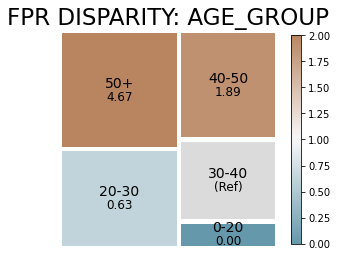

In [36]:
bdf[['attribute_name', 'attribute_value'] +  calculated_disparities + disparity_significance]

aqp.plot_disparity(bdf, group_metric='fpr_disparity', attribute_name='Age_Group', significance_alpha=0.05)

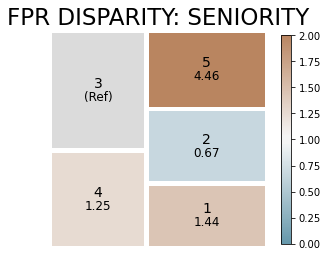

In [37]:
bdf[['attribute_name', 'attribute_value'] +  calculated_disparities + disparity_significance]

aqp.plot_disparity(bdf, group_metric='fpr_disparity', attribute_name='Seniority' , significance_alpha=0.05)

Created 3 FPR plots based on gender, age, and seniority. Age has the most bias and gender has the least bias.

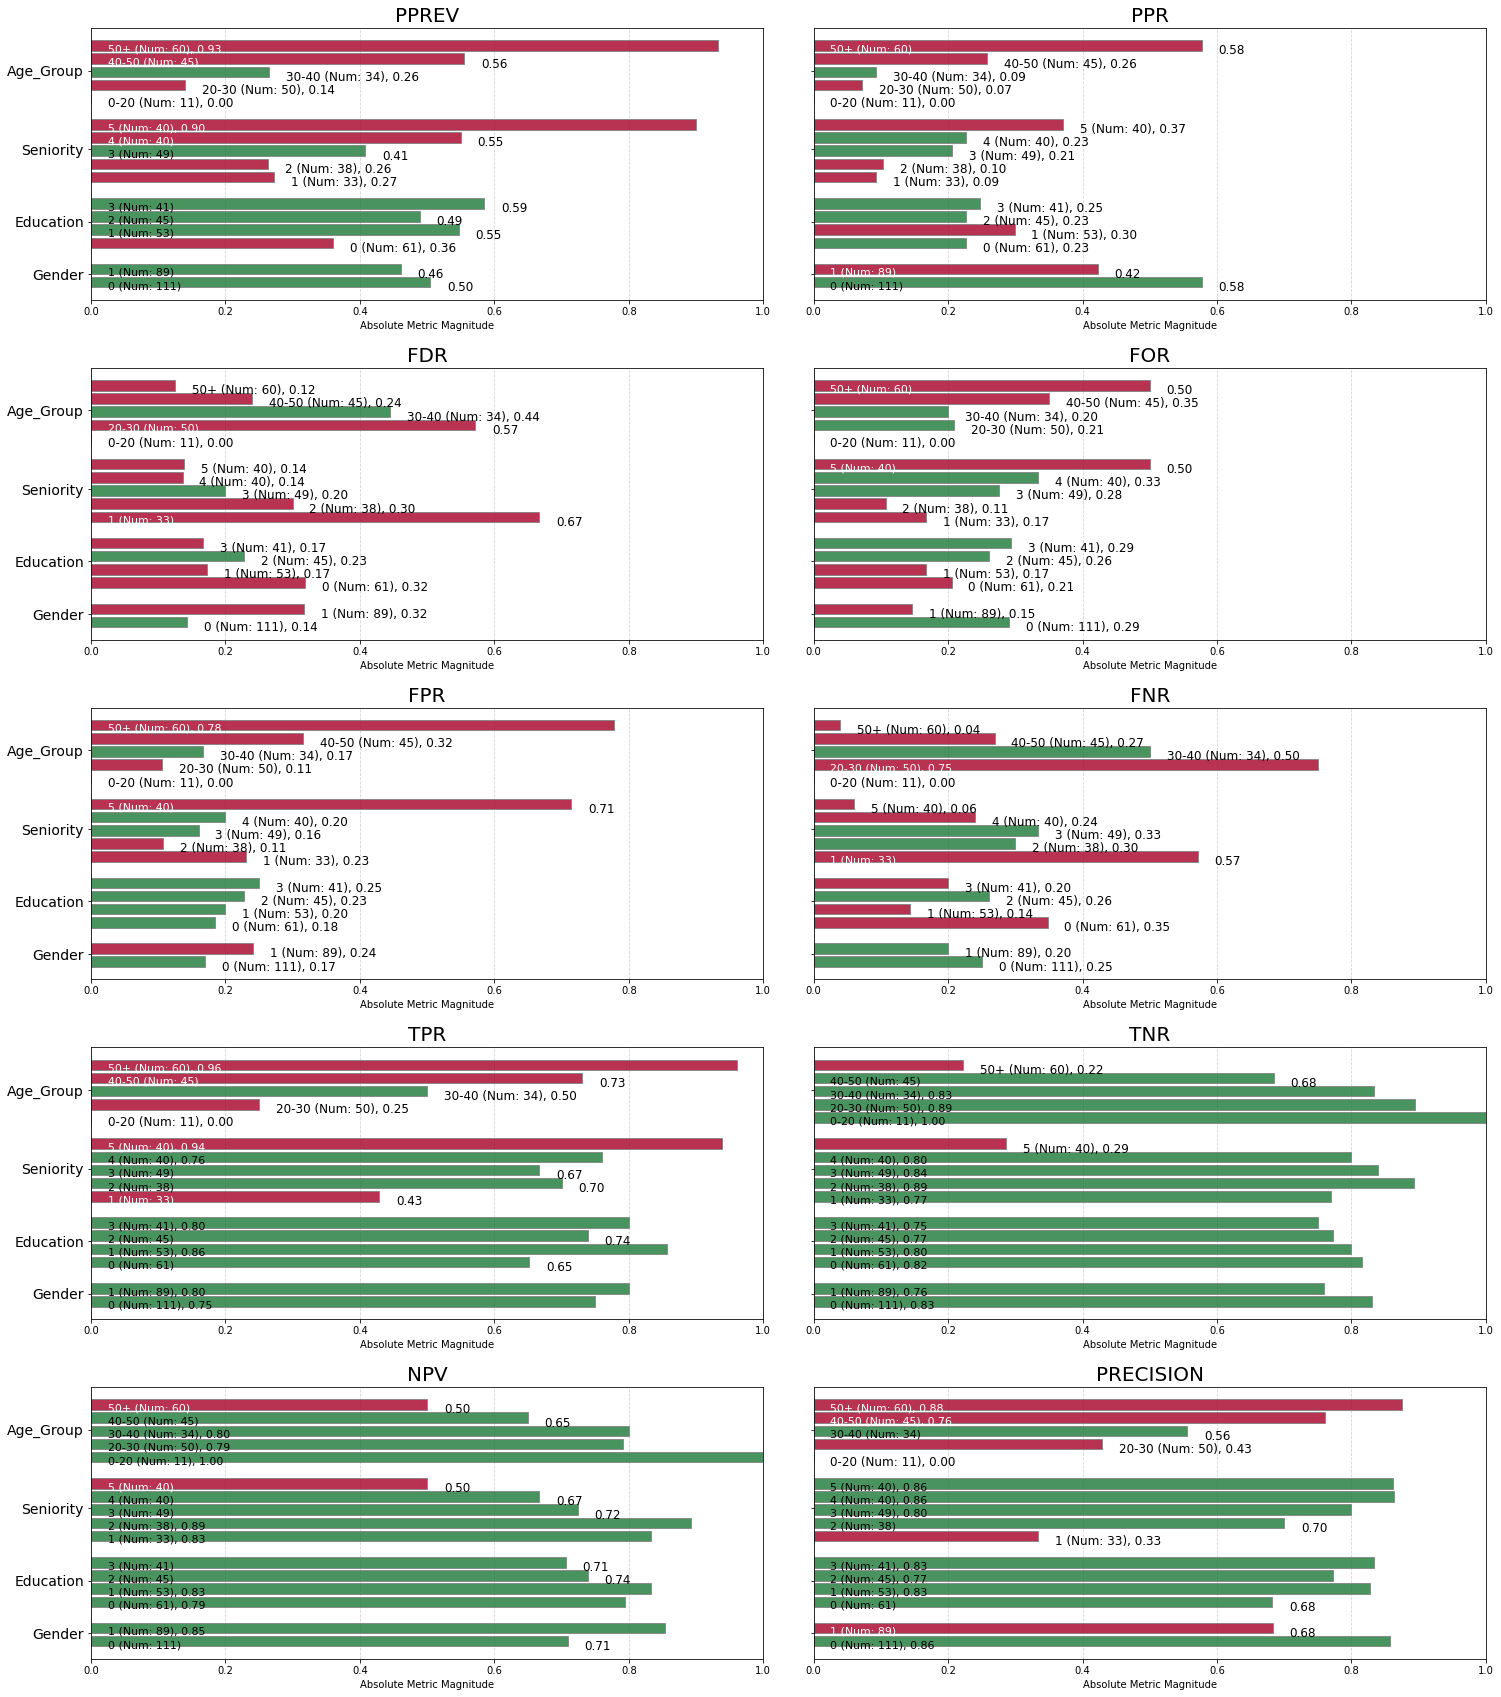

<Figure size 432x288 with 0 Axes>

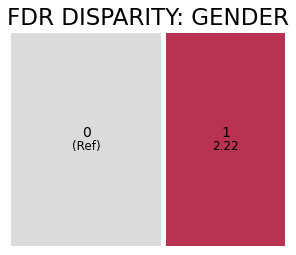

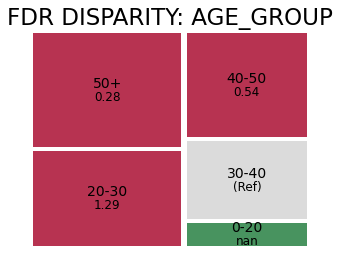

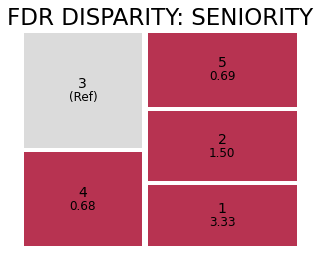

In [38]:
from aequitas.fairness import Fairness
f = Fairness()
fdf = f.get_group_value_fairness(bdf)
fg = aqp.plot_fairness_group_all(fdf, ncols=2, metrics = "all")
m = aqp.plot_fairness_disparity(fdf, group_metric='fdr', attribute_name='Gender')
m = aqp.plot_fairness_disparity(fdf, group_metric='fdr', attribute_name='Age_Group')
m = aqp.plot_fairness_disparity(fdf, group_metric='fdr', attribute_name='Seniority')

Created 3 FDR plots and since all three are majority red, it is safe to say that gender, age, and experience exhibit levels of unfairness when comparing income.